<a href="https://colab.research.google.com/github/rmendesl/TCC/blob/master/03_CreateModelPyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando o Modelo - Supervisionado

Primeiramente, devemos distinguir 4 tipos de tarefas de aprendizagem de máquina:
* Aprendizagem supervisionada;
* Aprendizagem não-supervisionada;
* Aprendizagem semi-supervisionada;
* Aprendizagem por reforço;

Nosso modelo será o supervisionado, aprendizagem supervisionada é a tarefa de encontrar uma função a partir de dados de treinamento rotulados. O objetivo é encontrar os parâmetros ótimos que ajustem um modelo que possa prever rótulos desconhecidos em outros objetos (o conjunto de teste). Se o rótulo é um número real, a tarefa chama-se regressão. Se o rótulo vem de um conjunto finito e não ordenado, então a tarefa chama-se classificação, essa última será a nossa tarefa.

A classificação binária é uma técnica supervisionada de aprendizado de máquina, na qual o objetivo é prever rótulos de classe categóricos que sejam discretos e não monitorados, como Aprovado/Reprovado, Positivo/Negativo, Padrão/Não Padrão etc. Alguns casos de uso do mundo real para classificação estão listados abaixo : 
* Exames médicos para determinar se um paciente tem uma determinada doença ou não - a propriedade de classificação é a presença da doença. 
* Um método de teste "aprovado ou reprovado" ou controle de qualidade nas fábricas, ou seja, decidir se uma especificação foi ou não atendida - uma classificação de aprovação / não aprovação. 
* Recuperação de informações, ou seja, decidir se uma página ou um artigo deve estar no conjunto de resultados de uma pesquisa ou não - a propriedade de classificação é a relevância do artigo ou a utilidade para o usuário.

Não iremos entrar nos detalhes dos demais tipos de aprendizagem, porém, segue abaixo algumas fontes para consulta.

Fonte: https://medium.com/machina-sapiens/algoritmos-de-aprendizagem-de-m%C3%A1quina-qual-deles-escolher-67040ad68737

Fonte: https://medium.com/@categitau/in-one-of-my-previous-posts-i-introduced-machine-learning-and-talked-about-the-two-most-common-c1ac6e18df16



## PyCaret

Nosso primeiro modelo usará o [PyCaret](https://pycaret.org/).

O que é o PyCaret? 

O PyCaret é uma biblioteca open source para aprendizado de máquina em [Python](https://www.python.org/), que visa reduzir a hipótese de insights sobre o tempo do ciclo em um experimento de ML. Ele permite que os cientistas de dados realizem experimentos completos de maneira rápida e eficiente. Em comparação com as outras bibliotecas de aprendizado de máquina open source, o PyCaret é uma biblioteca alternativa low-code que pode ser usada para executar tarefas complexas de aprendizado de máquina com apenas algumas linhas de código. PyCaret é simples e fácil de usar. Todas as operações executadas no PyCaret são armazenadas automaticamente em um pipeline personalizado totalmente orquestrado para implantação. O PyCaret é essencialmente um invólucro Python em torno de várias bibliotecas e estruturas de aprendizado de máquina, como [scikit-learn](https://scikit-learn.org/stable/), XGBoost, Microsoft LightGBM, spaCy e muito mais.

Sendo o PyCaret uma biblioteca low-code, você é mais produtivo. Com menos tempo gasto em codificação, podendo se concentrar em problemas de negócios.

PyCaret é uma solução pronta para negócios. Ele permite que você faça a criação de protótipos de maneira rápida e eficiente a partir da sua escolha do ambiente de notebook.





---


Instalando e atualizando o PyCaret:

`!pip install pycaret`

`!pip install -U pycaret`

Referência: https://pycaret.org/install/

In [ ]:
# Instalando o PyCaret
!pip install pycaret

In [ ]:
# Atualizando o PyCaret
!pip install -U pycaret

## Bibliotecas utilizadas

Referência para a bibioteca Pandas: https://pandas.pydata.org/docs/user_guide/index.html

Referência para a biblioteca Numpy: https://numpy.org/doc/

Referência para a biblioteca PyCaret: https://pycaret.org/guide/

In [9]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
from pycaret.utils import enable_colab 

enable_colab()

Colab mode activated.


## Carregando os dados

In [ ]:
# Execute apenas se desejar fazer o upload do arquivo local para o Google Drive

#from google.colab import files
#files.upload()

In [34]:
# Montando o drive do Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Os dados para o modelo foram salvos em um arquivo CSV durante a etapa anterior.

* `base_model.csv`

In [79]:
# Troque o caminho root_path caso seu arquivo esteja em outra pasta em seu drive
root_path = 'drive/My Drive/TCC/'
data = 'base_model.csv'

# Carregando os dados do arquivo CSV para o dataframe
df_renovacao = pd.read_csv(root_path + data, sep='|')

In [80]:
# Lendo os primeiros e últimos registros do dataframe
df_renovacao

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,51.18,0.00,0.00,0.00,SEM DIVIDA,1,9.00,7 - 100%,32.0,21.0,0,1 - Alto,3 - Médio Baixo,0,0,VETERANO
1,200702198245,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3111.20,3111.20,> 1500,0,5.91,4 - 41% A 60%,48.0,48.0,0,3 - Médio Baixo,4 - Baixo,1,0,CALOURO
2,200702198679,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,0.00,0.00,3238.77,3238.77,> 1500,0,5.27,3 - 21% A 40%,53.0,46.0,0,4 - Baixo,4 - Baixo,0,0,VETERANO
3,200801431011,1,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,2521.12,0.00,0.00,0.00,SEM DIVIDA,0,9.89,7 - 100%,130.0,119.0,0,4 - Baixo,2 - Médio Alto,1,0,VETERANO
4,200901402225,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,170.96,0.00,0.00,0.00,SEM DIVIDA,0,3.50,4 - 41% A 60%,125.0,70.0,0,00 - Não Escorado,00 - Não Escorado,1,0,VETERANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NÃO,0,0,ON TIME COMER,Ativo,534.38,0.00,0.00,0.00,SEM DIVIDA,0,7.54,7 - 100%,143.0,133.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO
2139,201912030853,1,ADIMPLENTE,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1157.48,5.16,0.00,5.16,SEM DIVIDA,0,6.31,5 - 61% A 80%,64.0,42.0,0,2 - Médio Alto,3 - Médio Baixo,1,0,VETERANO
2140,201912030861,0,ADIMPLENTE,MEDIO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Trancado,0.00,4.88,0.00,0.00,SEM DIVIDA,0,7.43,7 - 100%,154.0,109.0,1,3 - Médio Baixo,3 - Médio Baixo,1,0,VETERANO
2141,201912030934,1,INADIMPLENTE COM NEGOCIACAO,BAIXO RISCO,PAR,PAR,NÃO,0,0,ON TIME COMER,Ativo,1486.82,606.04,0.00,489.79,SEM DIVIDA,0,6.14,7 - 100%,154.0,147.0,0,4 - Baixo,3 - Médio Baixo,1,0,VETERANO


## Setup do modelo de Classificação

Referência: https://pycaret.org/classification/

In [15]:
# Importando o módulo de Classificação
from pycaret.classification import *

In [81]:
# Removendo a coluna de Código de Matrícula do Aluno
col_remove = ['COD_MATRICULA']

OBS: O erro abaixo pode ocorrer com o modelo LightGBM, portanto iremos fazer uma substituição dos caracteres non-ASCII

* *LightGBMError: Do not support non-ASCII characters in feature name.*

In [83]:
# Importando a biblioteca de expressões regulares
import re

# Selecionando apenas as colunas categóricas
col_categoricas = list(df_renovacao.select_dtypes(include=['object']).columns)

# Substituindo os nomes das colunas do dataframe
df_renovacao.rename(columns = lambda x : re.sub(r'[^\x00-\x7F]+', '', x), inplace=True)

# Substituindo os valores das colunas do dataframe
for column in col_categoricas:
  df_renovacao[column].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

df_renovacao

,COD_MATRICULA,REMATRICULADO,TIPO_INADIMPLENCIA,RISCO_INADIMPLENCIA,CLASSE_PAGANTE_ANT,CLASSE_PAGANTE_ATU,NOVO_FIES,PRV_ANT,PRV_ATU,LATE_COMER,NOM_SITUACAO_ALUNO,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,FAIXA_DE_DIVIDA,ADIMP_N_REN,CR_PER_ANT,FAIXA_APROVACAO,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,IND_INDICIO_EVASAO,CLASSIFICACAO_PROP_EVASAO,CLASSIFICACAO_PROP_RENOVACAO,ACEITE_CONTRATO,REQ_AGEND_TRANC,SAFRA
0,200701339023,0,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,51.18,0.00,0.00,0.00,SEM DIVIDA,1,9.00,7 - 100%,32.0,21.0,0,1 - Alto,3 - Mdio Baixo,0,0,VETERANO
1,200702198245,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,0.00,0.00,3111.20,3111.20,> 1500,0,5.91,4 - 41% A 60%,48.0,48.0,0,3 - Mdio Baixo,4 - Baixo,1,0,CALOURO
2,200702198679,0,INADIMPLENTE SEM NEGOCIACAO,MEDIO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,0.00,0.00,3238.77,3238.77,> 1500,0,5.27,3 - 21% A 40%,53.0,46.0,0,4 - Baixo,4 - Baixo,0,0,VETERANO
3,200801431011,1,ADIMPLENTE,SEM RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,2521.12,0.00,0.00,0.00,SEM DIVIDA,0,9.89,7 - 100%,130.0,119.0,0,4 - Baixo,2 - Mdio Alto,1,0,VETERANO
4,200901402225,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,170.96,0.00,0.00,0.00,SEM DIVIDA,0,3.50,4 - 41% A 60%,125.0,70.0,0,00 - No Escorado,00 - No Escorado,1,0,VETERANO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,201912030837,1,ADIMPLENTE,BAIXO RISCO,MENSALISTA,MENSALISTA,NO,0,0,ON TIME COMER,Ativo,534.38,0.00,0.00,0.00,SEM DIVIDA,0,7.54,7 - 100%,143.0,133.0,0,4 - Baixo,3 - Mdio Baixo,1,0,VETERANO
2139,201912030853,1,ADIMPLENTE,BAIXO RISCO,PAR,PAR,NO,0,0,ON TIME COMER,Ativo,1157.48,5.16,0.00,5.16,SEM DIVIDA,0,6.31,5 - 61% A 80%,64.0,42.0,0,2 - Mdio Alto,3 - Mdio Baixo,1,0,VETERANO
2140,201912030861,0,ADIMPLENTE,MEDIO RISCO,PAR,PAR,NO,0,0,ON TIME COMER,Trancado,0.00,4.88,0.00,0.00,SEM DIVIDA,0,7.43,7 - 100%,154.0,109.0,1,3 - Mdio Baixo,3 - Mdio Baixo,1,0,VETERANO
2141,201912030934,1,INADIMPLENTE COM NEGOCIACAO,BAIXO RISCO,PAR,PAR,NO,0,0,ON TIME COMER,Ativo,1486.82,606.04,0.00,489.79,SEM DIVIDA,0,6.14,7 - 100%,154.0,147.0,0,4 - Baixo,3 - Mdio Baixo,1,0,VETERANO




---


### Configurando o ambiente

A função `setup()` inicializa o ambiente no pycaret e cria o pipeline de transformação para preparar os dados para modelagem e implantação. `setup()` deve ser chamado antes de executar qualquer outra função no pycaret. São necessários dois parâmetros obrigatórios: um dataframe do pandas e o nome da variável alvo. Todos os outros parâmetros são opcionais e são usados ​​para personalizar o pipeline de pré-processamento. Quando `setup()` é executado, o algoritmo de inferência do PyCaret infere automaticamente os tipos de dados para todos os recursos com base em determinadas propriedades. O tipo de dados deve ser inferido corretamente, mas esse nem sempre é o caso. Para explicar isso, o PyCaret exibe uma tabela contendo os recursos e seus tipos de dados inferidos após o `setup()`. Se todos os tipos de dados forem identificados corretamente, `enter` pode ser pressionado para continuar ou `quit` para finalizar a experiência. Garantir que os tipos de dados estejam corretos é de fundamental importância no PyCaret, pois ele executa automaticamente algumas tarefas de pré-processamento que são essenciais para qualquer experimento de aprendizado de máquina. Essas tarefas são executadas de maneira diferente para cada tipo de dados, o que significa que é muito importante que sejam configuradas corretamente. 

Parâmetros usados para setar o modelo:

* ***data: dataframe***  - array-like, sparse matrix, shape (n_samples, n_features) em que n_samples é o número de amostras e n_features é o número de recursos.

* ***target: string***  - Nome da coluna de destino a ser transmitida como uma sequência. A variável de destino pode ser binária ou multiclasse. No caso de um alvo multiclasse, todos os estimadores são agrupados com um classificador OneVsRest.

* ***train_size: float, default = 0,7*** - Tamanho do conjunto de treinamento. Por padrão, 70% dos dados serão usados ​​para treinamento e validação. Os dados restantes serão usados ​​para um conjunto de teste/validação.

* ***ignore_features: string, default = None*** - Se algum recurso precisar ser ignorado para modelagem, ele poderá ser passado para o parâmetro ignore_features. As colunas ID e DateTime, quando inferidas, são automaticamente definido para ignorar para modelagem.

In [84]:
ml_setup = setup(data=df_renovacao, target='REMATRICULADO', train_size=0.7, session_id=1234, ignore_features=col_remove)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1234
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(2143, 27)"
4,Missing Values,False
5,Numeric Features,8
6,Categorical Features,18
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None




---

### Comparando os resultados dos modelos

Comparar todos os modelos para avaliar o desempenho é o ponto de partida recomendado para a modelagem após a conclusão da configuração (a menos que você saiba exatamente que tipo de modelo precisa, o que geralmente não é o caso). Essa função treina todos os modelos na biblioteca de modelos e os pontua usando validação cruzada estratificada para avaliação de métricas. A saída imprime uma grade de pontuação que mostra a Accuracy, AUC, Recall, Precision, F1 e Kappa by fold (10 por padrão) de todos os modelos disponíveis na biblioteca de modelos.

In [85]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,CatBoost Classifier,0.926700,0.934800,0.962100,0.948600,0.955100,0.753500
1,Linear Discriminant Analysis,0.924000,0.926200,0.952300,0.954100,0.953100,0.752500
2,Random Forest Classifier,0.922000,0.919300,0.956400,0.948000,0.952100,0.741200
3,Ridge Classifier,0.920700,0.000000,0.955600,0.947300,0.951300,0.736800
4,Extreme Gradient Boosting,0.920700,0.938900,0.962100,0.941600,0.951600,0.731200
5,Gradient Boosting Classifier,0.920000,0.940600,0.962100,0.940800,0.951200,0.729000
6,Ada Boost Classifier,0.915300,0.917700,0.969600,0.929400,0.949000,0.700500
7,Extra Trees Classifier,0.915300,0.932400,0.953100,0.943400,0.948100,0.718300
8,Light Gradient Boosting Machine,0.912000,0.931100,0.958800,0.934600,0.946400,0.699500
9,Quadratic Discriminant Analysis,0.898700,0.830700,0.972900,0.909200,0.939800,0.620800




---


### Criando o modelo

Embora `compare_models()` seja uma função poderosa e frequentemente um ponto de partida em qualquer experimento, ele não retorna nenhum modelo treinado. O fluxo de trabalho de experiência recomendado pelo PyCaret é usar `compare_models()` logo após a instalação para avaliar os modelos com melhor desempenho e finalizar alguns candidatos para a continuação da experimentação. Como tal, a função que realmente permite criar um modelo é chamada de `create_model()`. Essa função cria um modelo e o classifica usando a validação cruzada estratificada. Semelhante a `compare_models()`, a saída imprime uma grade de pontuação que mostra a Accuracy, AUC, Recall, Precision, F1 e Kappa by fold.

In [100]:
dt_model = create_model(estimator='rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.8744,0.9590,0.9213,0.9398,0.6463
1,0.9267,0.9343,0.9672,0.9440,0.9555,0.7481
2,0.8800,0.8662,0.9344,0.9194,0.9268,0.5936
3,0.9133,0.9027,0.9508,0.9431,0.9469,0.7106
4,0.9467,0.9371,0.9754,0.9597,0.9675,0.8194
5,0.9333,0.9364,0.9587,0.9587,0.9587,0.7863
6,0.9267,0.9182,0.9587,0.9508,0.9547,0.7618
7,0.9333,0.9517,0.9504,0.9664,0.9583,0.7917
8,0.9333,0.9315,0.9587,0.9587,0.9587,0.7863
9,0.9267,0.9404,0.9504,0.9583,0.9544,0.7679


Observe que a pontuação média do modelo corresponde à pontuação impressa em `compare_models()`. Isso ocorre porque as métricas impressas na grade de pontuação `compare_models()` são as pontuações médias em todas as dobras de CV. Semelhante a `compare_models()`, se você deseja alterar o parâmetro fold do valor padrão de 10 para um valor diferente, você pode usar o parâmetro `fold`. 

Por exemplo: `create_model('dt', fold = 5)` criará um classificador de árvore de decisão usando CV estratificado em 5 vezes.

Verificando a performance do modelo no conjunto de teste.

Antes de finalizar o modelo, é aconselhável executar uma verificação final prevendo o conjunto de teste/validação e revisando as métricas de avaliação.  Todas as métricas de avaliação que vimos acima são resultados validados cruzados com base apenas no conjunto de treinamento (70%).

In [101]:
predict_model(dt_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9316,0.9426,0.9693,0.9475,0.9583,0.7687


,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,CR_PER_ANT,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,RISCO_INADIMPLENCIA_ALTO RISCO,RISCO_INADIMPLENCIA_BAIXO RISCO,RISCO_INADIMPLENCIA_MEDIO RISCO,RISCO_INADIMPLENCIA_SEM RISCO,CLASSE_PAGANTE_ANT_FIES,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ATU_FIES,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PAR,CLASSE_PAGANTE_ATU_PROUNI,NOVO_FIES_NO,PRV_ANT_0,PRV_ATU_0,LATE_COMER_ON TIME COMER,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,FAIXA_DE_DIVIDA_100-300,FAIXA_DE_DIVIDA_1000-1500,FAIXA_DE_DIVIDA_300-500,FAIXA_DE_DIVIDA_500-750,FAIXA_DE_DIVIDA_750-1000,FAIXA_DE_DIVIDA_> 1500,FAIXA_DE_DIVIDA_SEM DIVIDA,ADIMP_N_REN_1,FAIXA_APROVACAO_1 - 0%,FAIXA_APROVACAO_2 - 1% A 20%,FAIXA_APROVACAO_3 - 21% A 40%,FAIXA_APROVACAO_4 - 41% A 60%,FAIXA_APROVACAO_5 - 61% A 80%,FAIXA_APROVACAO_6 - 81% A 99%,FAIXA_APROVACAO_7 - 100%,IND_INDICIO_EVASAO_0,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_2 - Mdio Alto,CLASSIFICACAO_PROP_EVASAO_3 - Mdio Baixo,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_00 - No Escorado,CLASSIFICACAO_PROP_RENOVACAO_1 - Alto,CLASSIFICACAO_PROP_RENOVACAO_2 - Mdio Alto,CLASSIFICACAO_PROP_RENOVACAO_3 - Mdio Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,ACEITE_CONTRATO_1,REQ_AGEND_TRANC_0,SAFRA_CALOURO,REMATRICULADO,Label,Score
0,513.68,0.0,0.0,0.0,1.30,58.0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0
1,806.22,0.0,0.0,0.0,7.25,70.0,48.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.9
2,790.41,0.0,0.0,0.0,6.74,140.0,158.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,1.0
3,860.86,0.0,0.0,0.0,6.73,115.0,94.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0
4,626.52,0.0,0.0,0.0,7.22,27.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1004.41,0.0,0.0,0.0,7.61,97.0,94.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0
639,382.26,0.0,0.0,0.0,7.90,122.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1,1,1.0
640,842.99,0.0,0.0,0.0,7.37,45.0,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.3
641,0.00,0.0,0.0,0.0,8.40,68.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,1.0


In [105]:
print(dt_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)




---


### Tunando o modelo

Quando um modelo é criado usando a função `create_model()`, ele usa os hiperparâmetros padrão. Para ajustar os hiperparâmetros, a função `tune_model()` é usada. Essa função ajusta automaticamente os hiperparâmetros de um modelo em um espaço de pesquisa predefinido e o classifica usando a validação cruzada estratificada. A saída imprime uma grade de pontuação que mostra a Accuracy, AUC, Recall Precision, F1 e Kappa by fold. 

**Nota:** `tune_model()` não aceita um objeto de modelo treinado como entrada. Em vez disso, requer que um nome de modelo seja passado como uma string abreviada semelhante à maneira como é passada em `create_model()`. Todas as outras funções no `pycaret.classification` requerem um objeto de modelo treinado como argumento.

In [117]:
dt_tuned = tune_model('rf', optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.9297,0.9672,0.9147,0.9402,0.6356
1,0.9200,0.9570,0.9590,0.9435,0.9512,0.7291
2,0.9000,0.9330,0.9508,0.9280,0.9393,0.6565
3,0.9000,0.9335,0.9590,0.9213,0.9398,0.6463
4,0.9267,0.9334,0.9508,0.9587,0.9547,0.7618
5,0.9467,0.9431,0.9752,0.9593,0.9672,0.8244
6,0.9267,0.9372,0.9587,0.9508,0.9547,0.7618
7,0.9400,0.9595,0.9669,0.9590,0.9630,0.8051
8,0.9400,0.9273,0.9669,0.9590,0.9630,0.8051
9,0.9333,0.9621,0.9421,0.9744,0.9580,0.7969


Verificando a performance do modelo tunado no conjunto de teste.

Antes de finalizar o modelo, é aconselhável executar uma verificação final prevendo o conjunto de teste/validação e revisando as métricas de avaliação.  Todas as métricas de avaliação que vimos acima são resultados validados cruzados com base apenas no conjunto de treinamento (70%).

In [118]:
predict_model(dt_tuned)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Random Forest Classifier,0.9471,0.9603,0.9808,0.9551,0.9678,0.8201


,VAL_A_PAGAR,VAL_A_PAGAR_PAR,VAL_DIVIDA_MENS,VAL_DIVIDA_TOTAL,CR_PER_ANT,QTD_ACESSOS_19_2,QTD_ACESSOS_20_1,TIPO_INADIMPLENCIA_ADIMPLENTE,TIPO_INADIMPLENCIA_INADIMPLENTE COM NEGOCIACAO,TIPO_INADIMPLENCIA_INADIMPLENTE SEM NEGOCIACAO,RISCO_INADIMPLENCIA_ALTO RISCO,RISCO_INADIMPLENCIA_BAIXO RISCO,RISCO_INADIMPLENCIA_MEDIO RISCO,RISCO_INADIMPLENCIA_SEM RISCO,CLASSE_PAGANTE_ANT_FIES,CLASSE_PAGANTE_ANT_MENSALISTA,CLASSE_PAGANTE_ANT_PROUNI,CLASSE_PAGANTE_ATU_FIES,CLASSE_PAGANTE_ATU_MENSALISTA,CLASSE_PAGANTE_ATU_PAR,CLASSE_PAGANTE_ATU_PROUNI,NOVO_FIES_NO,PRV_ANT_0,PRV_ATU_0,LATE_COMER_ON TIME COMER,NOM_SITUACAO_ALUNO_Ativo,NOM_SITUACAO_ALUNO_Trancado,NOM_SITUACAO_ALUNO_Transferido,FAIXA_DE_DIVIDA_100-300,FAIXA_DE_DIVIDA_1000-1500,FAIXA_DE_DIVIDA_300-500,FAIXA_DE_DIVIDA_500-750,FAIXA_DE_DIVIDA_750-1000,FAIXA_DE_DIVIDA_> 1500,FAIXA_DE_DIVIDA_SEM DIVIDA,ADIMP_N_REN_1,FAIXA_APROVACAO_1 - 0%,FAIXA_APROVACAO_2 - 1% A 20%,FAIXA_APROVACAO_3 - 21% A 40%,FAIXA_APROVACAO_4 - 41% A 60%,FAIXA_APROVACAO_5 - 61% A 80%,FAIXA_APROVACAO_6 - 81% A 99%,FAIXA_APROVACAO_7 - 100%,IND_INDICIO_EVASAO_0,CLASSIFICACAO_PROP_EVASAO_1 - Alto,CLASSIFICACAO_PROP_EVASAO_2 - Mdio Alto,CLASSIFICACAO_PROP_EVASAO_3 - Mdio Baixo,CLASSIFICACAO_PROP_EVASAO_4 - Baixo,CLASSIFICACAO_PROP_RENOVACAO_00 - No Escorado,CLASSIFICACAO_PROP_RENOVACAO_1 - Alto,CLASSIFICACAO_PROP_RENOVACAO_2 - Mdio Alto,CLASSIFICACAO_PROP_RENOVACAO_3 - Mdio Baixo,CLASSIFICACAO_PROP_RENOVACAO_4 - Baixo,ACEITE_CONTRATO_1,REQ_AGEND_TRANC_0,SAFRA_CALOURO,REMATRICULADO,Label,Score
0,513.68,0.0,0.0,0.0,1.30,58.0,55.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.9654
1,806.22,0.0,0.0,0.0,7.25,70.0,48.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.9920
2,790.41,0.0,0.0,0.0,6.74,140.0,158.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1,1,0.9579
3,860.86,0.0,0.0,0.0,6.73,115.0,94.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,0.9982
4,626.52,0.0,0.0,0.0,7.22,27.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1,1,0.9788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,1004.41,0.0,0.0,0.0,7.61,97.0,94.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,1,1.0000
639,382.26,0.0,0.0,0.0,7.90,122.0,120.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1,1,0.9838
640,842.99,0.0,0.0,0.0,7.37,45.0,36.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0.4584
641,0.00,0.0,0.0,0.0,8.40,68.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1,1,0.9810


In [119]:
print(dt_tuned)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=90, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)




---

### Plotando o resultado do modelo

Antes da finalização do modelo, a função `plot_model()` pode ser usada para analisar o desempenho em diferentes aspectos, como AUC, confusion_matrix, decision boundary etc. Essa função pega um objeto de modelo treinado e retorna um gráfico com base no teste/validação do conjunto.

Vamos ver alguns abaixo.

#### AUC Plot

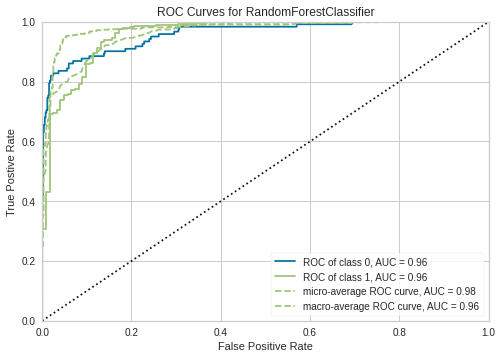

In [120]:
plot_model(dt_tuned, plot = 'auc')

#### Precision-Recall Curve

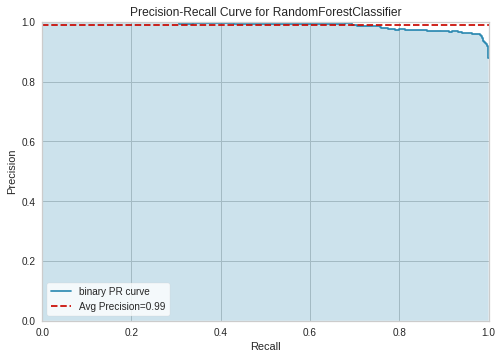

In [121]:
plot_model(dt_tuned, plot = 'pr')

#### Feature Importance Plot

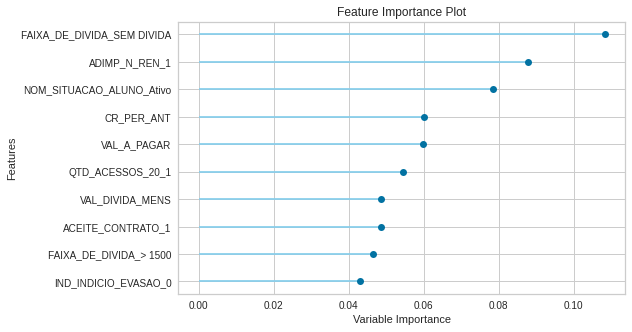

In [122]:
plot_model(dt_tuned, plot='feature')

#### Confusion Matrix

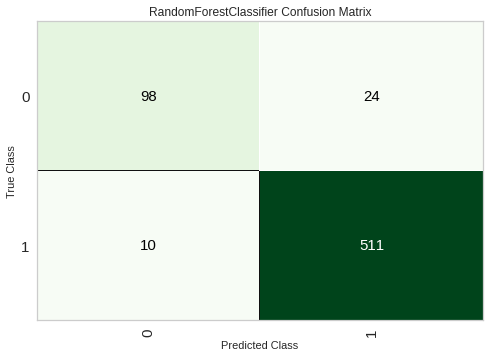

In [123]:
plot_model(dt_tuned, plot = 'confusion_matrix')

In [124]:
evaluate_model(dt_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…